In [1]:
import pickle 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [3]:
import xgboost as xgb
from xgboost import plot_importance

In [5]:
xgb_model = pickle.load(open("model_data/xgb_model.pkl", "rb"))
dataset_with_scores = pd.read_csv("model_data/dataset_with_preds.csv", index_col=0)

In [ ]:
#dataset_with_scores[['Pred_Score']].sort_values("Pred_Score", ascending=False).to_csv("model_data/prospect_desirability.csv")
#dataset_with_scores[['Score']].sort_values("Score", ascending=False).to_csv("model_data/nfl_desirability.csv")

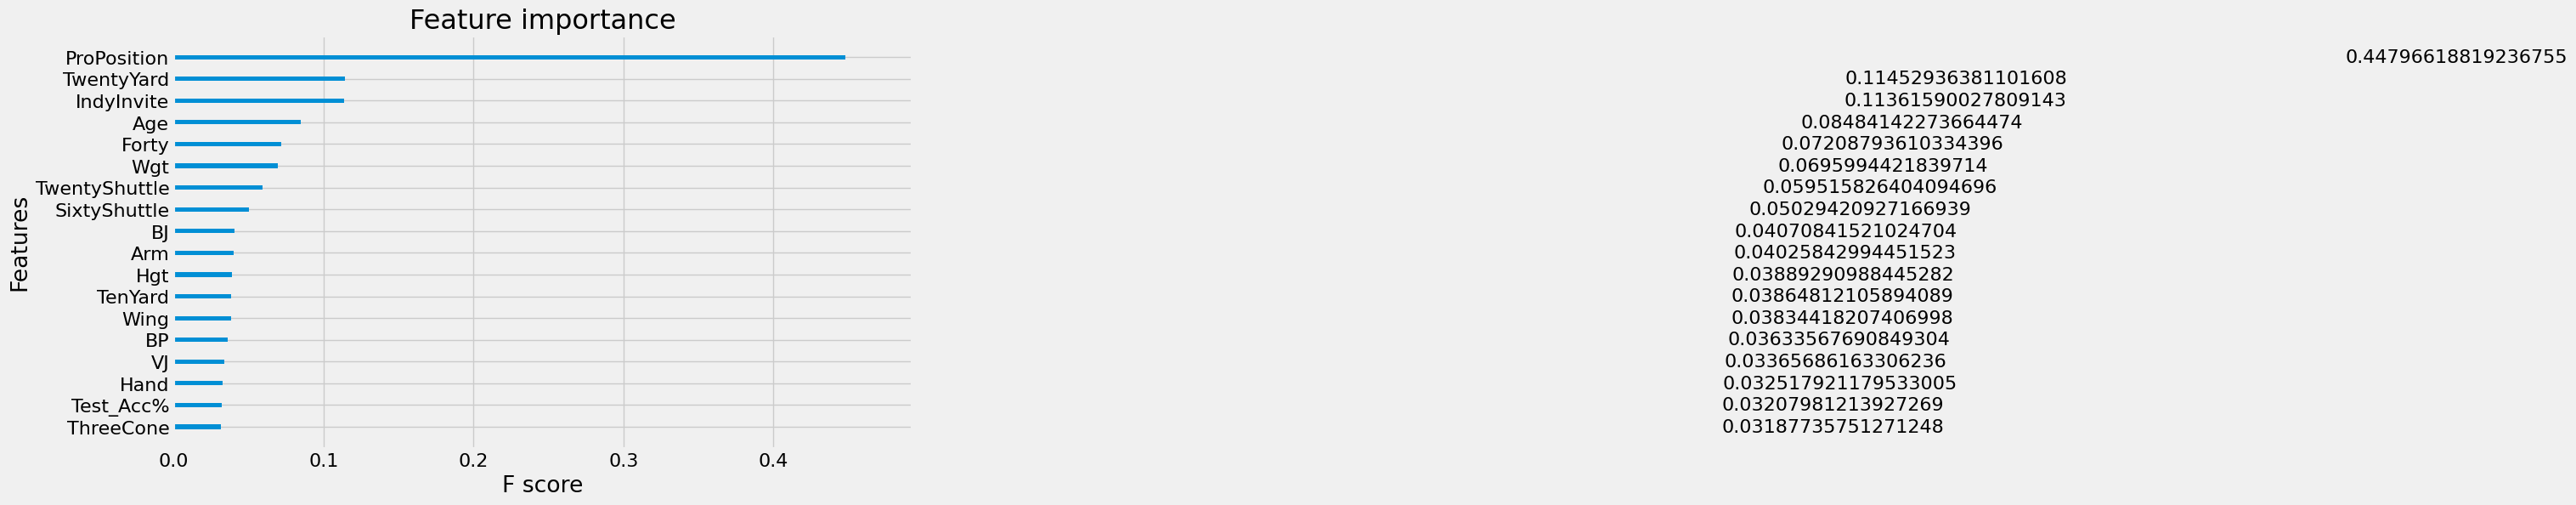

In [15]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax1 = plt.subplots(1,1, figsize=(10,6))
plot_importance(xgb_model, importance_type='gain', max_num_features=20, ax=ax1)
plt.show()

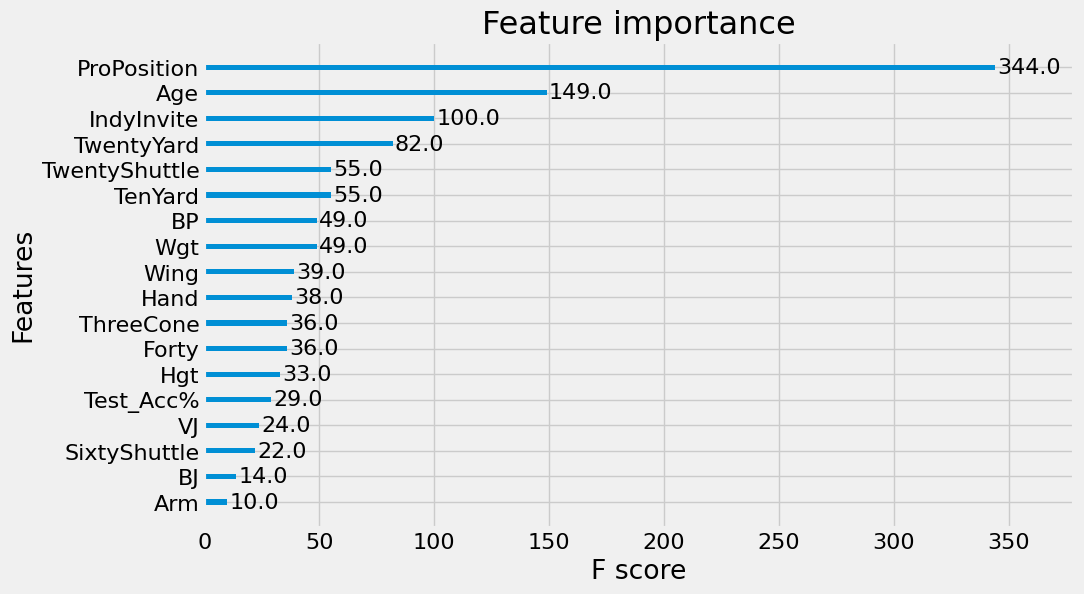

In [14]:
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax1 = plt.subplots(1,1, figsize=(10,6))
plot_importance(xgb_model, importance_type='weight', max_num_features=20, ax=ax1)
plt.show()

In [6]:
final_mse = np.power(dataset_with_scores.Pred_Score - dataset_with_scores.Score, 2).mean()
print(f"MSE = {np.round(final_mse, 5)}")
print(f"RMSE = {np.round(np.sqrt(final_mse), 5)}")
final_mae = abs(dataset_with_scores.Pred_Score - dataset_with_scores.Score).mean()
print(f"MAE = {np.round(final_mae, 5)}")

MSE = 0.00519
RMSE = 0.07203
MAE = 0.05594


In [11]:
dataset_with_scores.head()

,Pred_Score,Pred_Error,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,IndyInvite,Success
10018,0.387911,-0.002171,3,40,2,1141,94,53,0.833333,0.041667,0.082384,0.046450,0.871166,0.385740,DT,74.88,293.0,23.4,4.79,31.500,9.375,76.375,1.68,2.79,7.23,29.0,9.02,4.37,NaN,29.0,0.5652,Y,0
10081,0.404683,0.080240,4,52,48,1905,279,117,0.812500,0.750000,0.146457,0.061417,0.792126,0.484923,DT,75.88,336.0,21.3,5.28,33.125,10.125,79.625,1.90,3.03,7.62,24.5,NaN,4.82,NaN,19.0,0.9412,Y,1
10085,0.366298,-0.036166,4,21,7,642,80,46,0.328125,0.109375,0.124611,0.071651,0.803738,0.330132,QB,78.88,242.0,21.5,4.92,33.875,9.875,79.375,1.73,2.87,NaN,NaN,NaN,NaN,NaN,NaN,0.7576,Y,0
10100,0.391867,-0.042789,4,18,0,303,25,7,0.281250,0.000000,0.082508,0.023102,0.894389,0.349078,DE,75.38,284.0,21.7,4.76,35.500,9.625,80.375,1.74,2.77,7.16,34.5,9.10,4.40,NaN,25.0,0.5750,N,0
10163,0.309686,-0.034319,4,41,16,1663,37,90,0.640625,0.250000,0.022249,0.054119,0.923632,0.275367,DS,72.50,209.0,22.9,4.59,31.000,9.375,74.125,1.61,2.64,6.84,34.5,9.09,4.26,11.52,17.0,0.7692,Y,0


In [22]:
num_score = dataset_with_scores[(dataset_with_scores['Pred_Score'] >= 0.3)]
num_starters_with_score = num_score[(num_score['GS%'] >= 0.8) | (num_score['GamesPlayed'] >= 40)]

In [24]:
print(f"Number with score = {num_score.shape[0]}")
print(f"Starters|score = {num_starters_with_score.shape[0]}")
print(f"P(starter | score) = {num_starters_with_score.shape[0]/num_score.shape[0]}")


Number with score = 767
Starters|score = 433
P(starter | score) = 0.5645371577574967


In [16]:
num_starters = dataset_with_scores[(dataset_with_scores['GS%'] >= 0.8) | (dataset_with_scores['GamesPlayed'] >= 40)]


<Axes: >

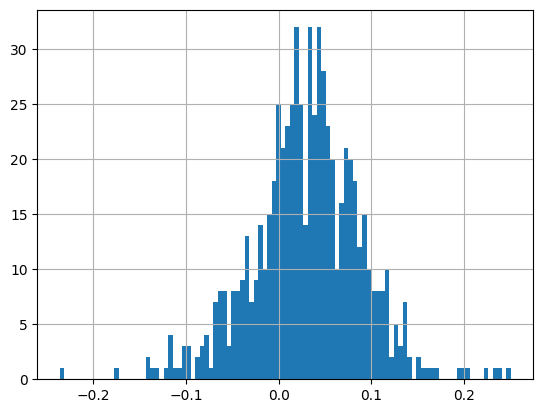

In [19]:
num_starters.Pred_Error.hist(bins=100)

<Axes: >

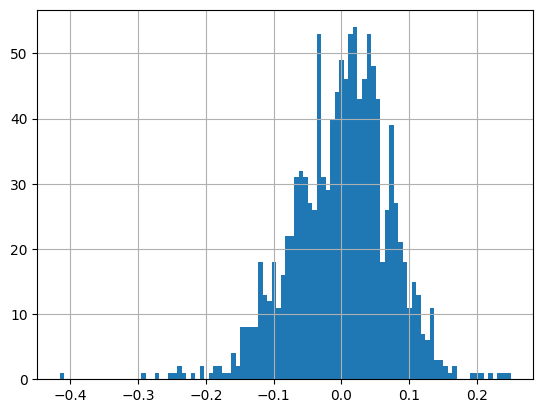

In [8]:
pd.Series(dataset_with_scores.Pred_Error).hist(bins=100)

<Axes: >

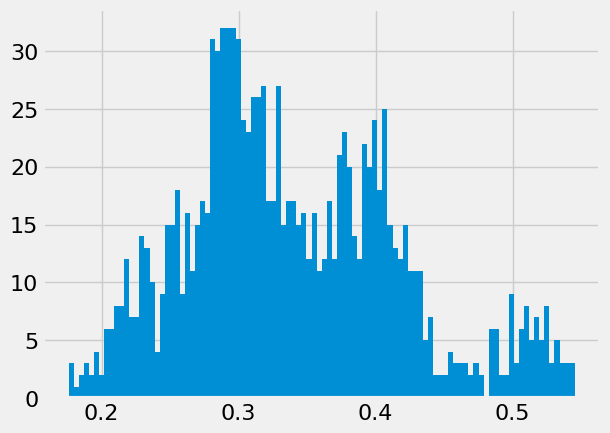

In [8]:
pd.Series(dataset_with_scores.Pred_Score).hist(bins=100)

In [9]:
dataset_with_scores.query("ProPosition == 'QB'").describe()

,Pred_Score,Pred_Error,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,Success
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,37.000000,39.000000,39.000000,39.000000,37.000000,37.000000,31.000000,34.000000,34.000000,33.000000,4.000000,1.0,38.000000,39.000000
mean,0.325667,-0.000210,3.230769,25.717949,20.512821,1416.974359,209.692308,128.358974,0.452858,0.348291,0.129270,0.094917,0.775813,0.325457,74.945385,221.512821,23.082051,4.780000,32.153846,9.676282,76.855769,1.682432,2.761351,7.108710,31.676471,8.986176,4.306061,11.697500,17.0,0.694408,0.333333
std,0.026873,0.096523,1.012073,19.196969,21.083633,1389.372170,231.586196,125.303314,0.272826,0.316631,0.035208,0.023265,0.047141,0.100277,2.019978,11.796234,1.224932,0.182452,1.206296,0.529335,2.407591,0.070569,0.111559,0.222122,3.108840,0.679099,0.173312,0.215155,NaN,0.100243,0.477567
min,0.247694,-0.176357,1.000000,1.000000,0.000000,66.000000,6.000000,5.000000,0.062500,0.000000,0.043909,0.029745,0.694974,0.166439,70.500000,197.000000,21.300000,4.360000,29.000000,8.375000,72.250000,1.520000,2.570000,6.730000,26.500000,8.030000,3.980000,11.580000,17.0,0.523800,0.000000
25%,0.311980,-0.067519,2.500000,12.500000,5.500000,469.000000,33.000000,37.000000,0.213542,0.109375,0.115734,0.083252,0.752231,0.258177,73.880000,213.000000,22.550000,4.630000,31.437500,9.250000,75.312500,1.630000,2.660000,6.945000,29.500000,8.317500,4.200000,11.587500,17.0,0.615750,0.000000
50%,0.326444,-0.003172,4.000000,21.000000,9.000000,652.000000,93.000000,69.000000,0.406250,0.250000,0.134969,0.096005,0.768912,0.313602,75.000000,222.000000,23.100000,4.850000,32.000000,9.625000,76.375000,1.660000,2.760000,7.080000,31.250000,9.035000,4.300000,11.595000,17.0,0.697850,0.000000
75%,0.337849,0.065580,4.000000,34.500000,29.500000,1920.500000,266.000000,183.000000,0.544271,0.484375,0.150941,0.107013,0.786234,0.379025,76.065000,229.000000,23.600000,4.920000,32.937500,10.000000,78.312500,1.750000,2.860000,7.205000,34.000000,9.100000,4.420000,11.705000,17.0,0.742350,1.000000
max,0.375548,0.223312,4.000000,64.000000,64.000000,4243.000000,716.000000,411.000000,1.000000,1.000000,0.189468,0.143451,0.926346,0.549756,79.130000,248.000000,28.600000,5.080000,35.000000,10.875000,83.500000,1.820000,2.940000,7.550000,39.000000,10.040000,4.680000,12.020000,17.0,0.909100,1.000000


In [9]:
dataset_with_scores.sort_values("Pred_Error")

,Pred_Score,Pred_Error,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,IndyInvite,Success
21010,0.216999,-0.415578,3,17,0,98,0,26,0.354167,0.00000,0.000000,0.265306,0.734694,-0.198580,OT,77.25,302.0,23.2,5.04,34.125,10.125,84.000,NaN,NaN,7.65,32.5,9.01,4.79,NaN,30.0,0.7097,N,0
39351,0.366512,-0.292611,2,20,2,249,7,40,0.625000,0.06250,0.028112,0.160643,0.811245,0.073901,DE,80.88,302.0,22.7,4.88,34.750,9.750,83.500,1.71,2.78,7.23,35.5,10.02,4.37,NaN,23.0,0.7907,N,0
57524,0.320172,-0.271634,1,4,0,65,0,8,0.250000,0.00000,0.000000,0.123077,0.876923,0.048538,DT,74.63,305.0,23.9,5.17,33.750,10.500,81.500,1.81,3.02,7.45,28.0,8.08,4.69,NaN,26.0,0.2857,N,0
99701,0.375254,-0.252366,4,39,0,66,1,8,0.609375,0.00000,0.015152,0.121212,0.863636,0.122888,WR,74.00,224.0,23.9,4.64,31.750,9.000,78.375,1.68,2.71,6.93,35.5,9.09,4.13,NaN,NaN,0.4400,Y,0
22883,0.316746,-0.242833,1,9,2,214,9,36,0.562500,0.12500,0.042056,0.168224,0.789720,0.073914,ILB,73.38,243.0,22.2,4.70,33.250,10.000,79.125,1.66,2.70,7.30,33.0,9.05,4.26,11.75,15.0,0.7097,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80233,0.476838,0.204545,4,64,64,2371,479,43,1.000000,1.00000,0.202024,0.018136,0.779840,0.681383,RB,70.00,218.0,23.4,4.61,31.750,10.250,77.250,1.64,2.66,7.01,35.5,9.09,4.19,11.86,16.0,0.8000,Y,1
23427,0.326444,0.223312,4,64,64,4186,695,264,1.000000,1.00000,0.166030,0.063067,0.770903,0.549756,QB,70.88,204.0,23.4,4.53,31.250,10.250,76.000,1.59,2.65,6.97,34.0,9.10,4.09,NaN,NaN,0.7000,Y,1
17233,0.321336,0.235559,4,53,48,1029,164,34,0.828125,0.75000,0.159378,0.033042,0.807580,0.556895,DT,74.63,339.0,23.4,5.60,33.250,10.625,80.875,1.92,3.18,7.80,25.0,7.09,4.99,NaN,34.0,0.5833,N,1
29262,0.398328,0.238769,4,64,64,3981,696,88,1.000000,1.00000,0.174830,0.022105,0.803065,0.637096,OLB,74.63,251.0,23.2,4.62,33.250,10.250,81.750,1.69,2.67,7.08,40.0,10.08,4.18,NaN,23.0,0.8500,Y,1


id 21010 (OT) : model ranked highly. looks very big and explosive. 
                Arm & Hand at 50th percentile, Three Cone > 50th
                Wing > 75th, VJ > 75th, BJ > 75th, BP > 75th

id 23427 (QB) : low height and weight, good 20yard score


In [35]:
dataset_with_scores.groupby("ProPosition").Pred_Error.apply(lambda x : np.abs(x).mean())

ProPosition
DC     0.045666
DE     0.068493
DS     0.041002
DT     0.073560
FB     0.077323
ILB    0.055289
OC     0.062980
OG     0.056660
OLB    0.055158
OT     0.064692
QB     0.077167
RB     0.058583
TE     0.049408
WR     0.047455
Name: Pred_Error, dtype: float64

In [29]:
dataset_with_scores.ProPosition.unique()

array(['DT', 'QB', 'DE', 'DS', 'WR', 'TE', 'OC', 'OLB', 'OG', 'ILB', 'OT',
       'DC', 'RB', 'FB'], dtype=object)

In [30]:
qb = dataset_with_scores.query("ProPosition == 'QB'")
rb = dataset_with_scores.query("ProPosition == 'RB'")
de = dataset_with_scores.query("ProPosition == 'DE'")
og = dataset_with_scores.query("ProPosition == 'OG'")

In [ ]:
og_ids_to_check = [
    98373,  # 1st, 
    92052,  # 2nd, 
    43757,  # 2nd to last,
    11187,  # last, 
    ]

In [37]:
og.sort_values("Pred_Score", ascending=False)

,Pred_Score,Pred_Error,num_seasons,GamesPlayed,GamesStarted,Plays,PositivePlays,NegativePlays,GP%,GS%,PosPlay%,NegPlay%,NeutPlay%,Score,ProPosition,Hgt,Wgt,Age,Forty,Arm,Hand,Wing,TenYard,TwentyYard,ThreeCone,VJ,BJ,TwentyShuttle,SixtyShuttle,BP,Test_Acc%,IndyInvite,Success
98373,0.300297,-0.114929,4,49,37,2599,52,316,0.765625,0.578125,0.020008,0.121585,0.858407,0.185369,OG,76.75,329.0,20.7,5.61,33.000,10.125,82.000,1.96,3.23,8.08,27.0,7.11,5.15,NaN,22.0,0.7941,Y,0
92052,0.300065,-0.066922,4,56,13,1179,41,121,0.875000,0.203125,0.034775,0.102629,0.862595,0.233144,OG,75.13,312.0,21.7,4.96,34.750,9.375,81.750,1.76,2.89,NaN,NaN,NaN,NaN,NaN,27.0,0.5918,Y,0
51802,0.290457,-0.061615,4,42,14,1166,56,115,0.656250,0.218750,0.048027,0.098628,0.853345,0.228842,OG,75.63,309.0,22.0,5.29,33.500,9.625,80.000,1.90,3.15,7.77,25.0,8.05,4.58,NaN,21.0,0.3939,Y,0
36407,0.282381,0.052288,4,58,54,3759,204,320,0.906250,0.843750,0.054270,0.085129,0.860601,0.334669,OG,74.63,310.0,20.9,4.94,34.125,9.500,80.125,1.81,2.88,8.18,27.5,8.06,4.77,NaN,25.0,0.3400,Y,1
84453,0.280511,0.004399,3,37,32,2295,136,229,0.770833,0.666667,0.059259,0.099782,0.840959,0.284910,OG,75.25,320.0,21.9,5.06,34.125,10.000,82.125,1.79,2.97,7.45,NaN,NaN,4.63,NaN,27.0,0.8148,Y,0
68986,0.280047,0.048762,4,47,47,3144,158,216,0.734375,0.734375,0.050254,0.068702,0.881043,0.328809,OG,76.25,302.0,22.6,4.97,33.875,9.875,81.500,1.74,2.86,7.37,32.0,9.06,4.44,NaN,22.0,0.6444,Y,1
26456,0.279754,-0.067808,2,16,11,757,30,71,0.500000,0.343750,0.039630,0.093791,0.866579,0.211946,OG,77.88,330.0,21.8,5.36,32.000,9.500,77.750,1.89,3.04,8.13,26.5,8.07,4.86,NaN,36.0,0.6923,Y,0
19930,0.277654,0.067059,4,50,44,3180,239,256,0.781250,0.687500,0.075157,0.080503,0.844340,0.344713,OG,77.00,346.0,22.6,4.99,33.500,10.000,80.250,1.72,2.81,7.38,32.0,8.09,4.58,NaN,36.0,0.6111,N,1
48438,0.275777,-0.025727,1,7,0,100,3,5,0.437500,0.000000,0.030000,0.050000,0.920000,0.250050,OG,74.00,317.0,22.4,5.43,33.750,9.625,78.750,1.95,3.10,8.07,23.0,7.11,4.82,NaN,35.0,0.5667,Y,0
17637,0.275103,-0.106290,3,17,1,99,6,11,0.354167,0.020833,0.060606,0.111111,0.828283,0.168813,OG,74.50,293.0,23.4,4.86,33.125,9.500,78.625,1.71,2.87,7.99,31.5,9.04,4.65,NaN,20.0,0.5510,Y,0
